In [10]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows',None)

In [11]:
dt = pd.read_csv("./url_spam_classification.csv")

In [12]:
print(dt.head())
print(dt.shape)
print(dt.dtypes)
print(dt.isnull().sum())

                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...     True
1                             https://www.hvper.com/     True
2                 https://briefingday.com/m/v4n3i4f3     True
3   https://briefingday.com/n/20200618/m#commentform    False
4                        https://briefingday.com/fan     True
(148303, 2)
url        object
is_spam      bool
dtype: object
url        0
is_spam    0
dtype: int64


In [13]:
## extracting data from URLs : Taking too much time
#for u in dt.url:
#    end = u.rfind("/",3)
#    start = u.rfind('.')
#    dt["Domain"] = u[start+1:end].split("/")[0]

In [14]:
## Processed in 1 sec
dt["Domain"] = [u[u.rfind('.')+1:u.rfind("/",3)].split("/")[0] for u in dt.url]

In [15]:
print(dt["Domain"].nunique())
print(dt["Domain"].unique())

433
['com' 'edu' 'org' '' 'co' 'us' 'ca' 'net' 'blog' 'uk' 'com:443' 'io' 'fm'
 'ai' 'cool' 'de' 'gov' 'mn' 'fyi' 'mp' 'tech' '0' 'nyc' 'Buolamwini'
 'int' 'blue' 'dream' 'app' 'at' 'ru' 'woa' 'au' 'wtf' 'tv' 'php' 'google'
 'eu' 'dk' 'show' 'to' 'gold' 'nl' 'xyz' 'dev' 'me' 'djvu' 'jp'
 'photography' 'club' 'sa' 'fr' 'world' 'is' '32881' 'commission#!'
 'agency' 'it' 'biz' 'ski' 'info' 'computer' 'london' 'cc' 'in' 'ee'
 'coffee' 'one' 'design' 'space' 'so' 'farm' 'link' 'vu' '1093' 'cfm' 'nz'
 'law' 'sg' 'land' 'plus' 'rip' 'hr' 'bid' 'af' 'ml' 'haus' 'ly' 'no'
 'idg' 'earth' 'ch' 'media' 'work' '1l2x' '1m8h' '1kxw' 'institute'
 'website' 'pm' 'school' 'page' 'audio' '2019' 'email' 'style' '1htx' 'hu'
 'vc' '1m4n' '1k19' '1' '1k3b' 'news' 'tube' '1h1c' 'pdf' '1hvq' 'supply'
 '0_release_announcement' 'ht' 'codes' 'be' 'st' 'site' 'gg' 'camera'
 'lol' 're' 'watch' 'html' 'museum' '1nav' 'han' 'cnn' '1sdb' 'am' 'gd'
 'bureau#!' '1kyg' 'house' 'life' '1err' '9669344,15z' 'brown' '9y4'
 '

In [16]:
## checking random domains
print(dt[dt["Domain"]=="house"])
print(dt[dt["Domain"]=="tr"])

                                         url  is_spam Domain
24412          https://getaway.house/booking    False  house
144252  https://thebrick.house/dear-readers/    False  house
                                                      url  is_spam Domain
146915  https://www.aa.com.tr/en/politics/turkey-s-pos...    False     tr


In [17]:
#dt["Domain"].value_counts()
## Renaming domains
doms = ["com"," ","org","co","io","mp","uk","net","fm","edu","gov"]
dt["Domain_grp"] = [u if u in doms else "other" for u in dt["Domain"]]

In [18]:
dt.head()

,url,is_spam,Domain,Domain_grp
0,https://briefingday.us8.list-manage.com/unsubs...,True,com,com
1,https://www.hvper.com/,True,com,com
2,https://briefingday.com/m/v4n3i4f3,True,com,com
3,https://briefingday.com/n/20200618/m#commentform,False,com,com
4,https://briefingday.com/fan,True,com,com


In [19]:
## Creating length
dt["url_length"] = [len(u) for u in dt.url]

In [20]:
dt["IS_subscribe"] = [1 if 'subscribe' in u else 0 for u in dt.url ]

In [21]:
dt["IS_hash"] = [1 if '#' in u else 0 for u in dt.url]

In [22]:
dt["IS_www"] = [1 if 'www' in u else 0 for u in dt.url]

In [23]:
dt["IS_https"] = [1 if 'https' in u else 0 for u in dt.url]

In [24]:
dt["word_count"] = [len(u.split("/")) for u in dt.url]

In [25]:
dt.drop(columns=['url','Domain'],inplace=True)

#### Feature engineering is complete

## Starting with EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='url_length', ylabel='Density'>

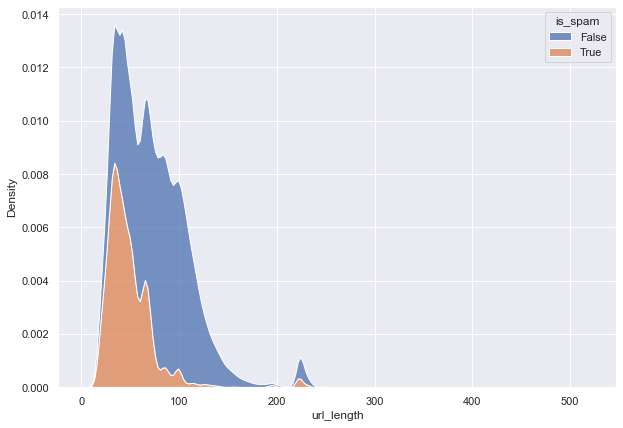

In [27]:
plt.figure(figsize=[10,7])
sns.kdeplot(data=dt,x="url_length",hue="is_spam",multiple='stack')

more spams are there for short url length

<AxesSubplot:xlabel='word_count', ylabel='is_spam'>

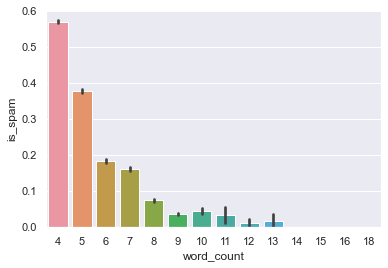

In [28]:
sns.barplot(data=dt,x="word_count",y="is_spam")

<Figure size 504x288 with 0 Axes>

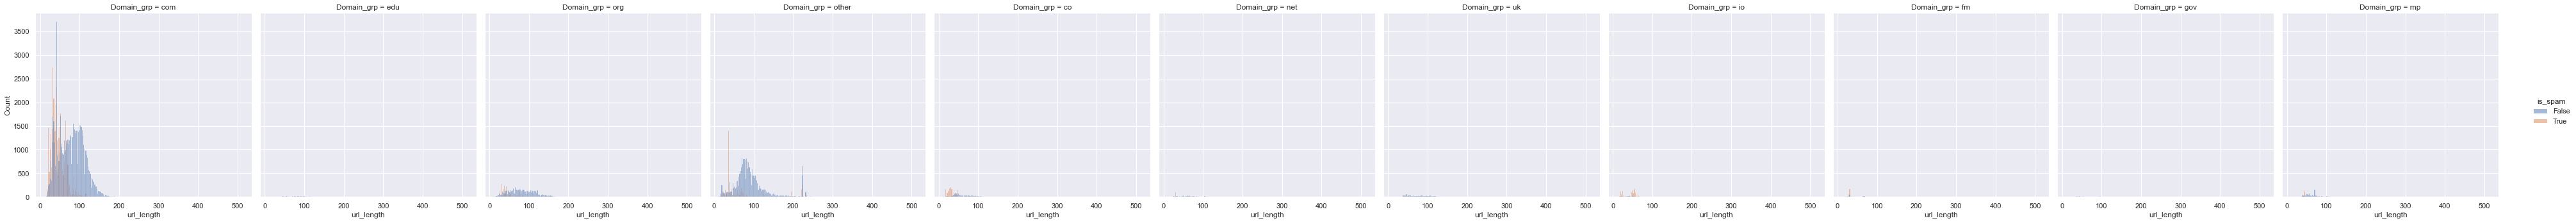

In [29]:
plt.figure(figsize=[7,4])
#plt.subplot2grid([3,4])
sns.displot(data=dt, x="url_length", hue="is_spam", col="Domain_grp")

In [30]:
## Building model

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [42]:
dt.head()

,is_spam,Domain_grp,url_length,IS_subscribe,IS_hash,IS_www,IS_https,word_count
0,1,0,51,1,0,0,1,4
1,1,0,22,0,0,1,1,4
2,1,0,34,0,0,0,1,5
3,0,0,48,0,1,0,1,6
4,1,0,27,0,0,0,1,4


In [33]:
## replace True/False with 1 & 0
dt["is_spam"] = dt["is_spam"].map({True:1,False:0})

In [41]:
## Convering Domain Group in numerical variable
domain_codes = {"com":0," ":1,"org":2,"co":3,"io":4,"mp":5,"uk":6,"net":7,"fm":8,"edu":9,"gov":10,"other":11}

dt.Domain_grp = dt.Domain_grp.map(domain_codes)

In [43]:
# splitting train and test data
Y = dt["is_spam"]
x = dt.drop(columns=['is_spam'])

In [45]:
x.head()

,Domain_grp,url_length,IS_subscribe,IS_hash,IS_www,IS_https,word_count
0,0,51,1,0,0,1,4
1,0,22,0,0,1,1,4
2,0,34,0,0,0,1,5
3,0,48,0,1,0,1,6
4,0,27,0,0,0,1,4


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.2)

In [50]:
## Fitting various models
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [51]:
rf.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)

C:\Users\haris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [52]:
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)

In [55]:
## Model selection
print("Random Forest Accuracy: ",accuracy_score(y_test,rf_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,lr_pred))
print("Knn accuracy: ",accuracy_score(y_test,knn_pred))

Random Forest Accuracy:  0.8794713596979198
Logistic Regression Accuracy:  0.7655170088668622
Knn accuracy:  0.8569164896665655


<AxesSubplot:>

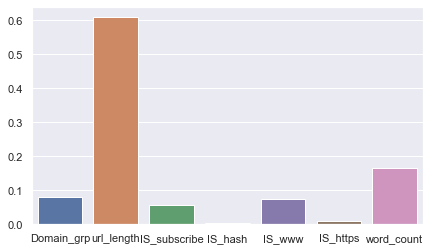

### Random Forest and KNN giving higher accuracy

In [62]:
## Doing model selection for KNN

knn_v2 = KNeighborsClassifier(n_neighbors=3)
knn_v2.fit(X_train,y_train)
knn_V2_pred = knn_v2.predict(X_test)
print("knnV2 Accuracy: ",accuracy_score(y_test,knn_V2_pred))
print(classification_report(y_test,knn_V2_pred))

knnV2 Accuracy:  0.8549947742827282
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     20260
           1       0.76      0.79      0.78      9401

    accuracy                           0.85     29661
   macro avg       0.83      0.84      0.83     29661
weighted avg       0.86      0.85      0.86     29661



<AxesSubplot:>

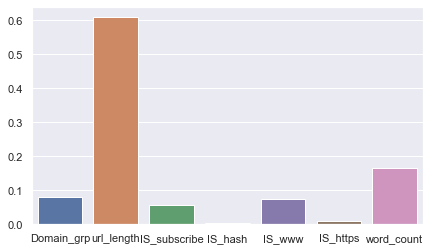

In [67]:
#print(rf.feature_importances_,X_train.columns)
plt.figure(figsize=[7,4])
sns.barplot(x=X_train.columns,y=rf.feature_importances_)

In [70]:
## Doing model selection for Random Forest with parameter tunning and variable selection
X_trainV2 = X_train.drop(columns=["IS_hash"])
X_testV2 = X_test.drop(columns=["IS_hash"])
rf2 = RandomForestClassifier()
rf2.fit(X_trainV2,y_train)

RandomForestClassifier()

In [71]:
rf_predV2 = rf2.predict(X_testV2)

In [73]:
print("RFV2 Accuracy: ",accuracy_score(y_test,rf_predV2))
print(classification_report(y_test,rf_predV2))
print(confusion_matrix(y_test,rf_predV2))

RFV2 Accuracy:  0.8793365024780014
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20260
           1       0.79      0.84      0.82      9401

    accuracy                           0.88     29661
   macro avg       0.86      0.87      0.86     29661
weighted avg       0.88      0.88      0.88     29661

[[18154  2106]
 [ 1473  7928]]


In [76]:
## performing hyper parameter tunning 
n_estimators = [100,200,300,500,1000]
criterion = ['gini','entropy']
max_features = ["auto", "sqrt", "log2"]
max_depth = [10,20,30,None]
min_samples_split= [2,3,5]
min_samples_leaf=[1,2,3,4,5]

grid = {'n_estimators' : n_estimators,
        'criterion' : criterion,
       'max_features':max_features,
        'max_depth': max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf': min_samples_leaf }


In [78]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomForestClassifier()
rf_grid_model = RandomizedSearchCV(estimator=rf_grid,param_distributions=grid,
                              n_iter= 10, cv=10,verbose=2,random_state= 42,n_jobs=-1)

In [80]:
rf_grid_model.fit(X_trainV2,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=42, verbose=2)

In [81]:
rf_grid_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy'}

In [82]:
rf_opt = rf_grid_model.predict(X_testV2)

In [83]:
print("RF opt Accuracy: ",accuracy_score(y_test,rf_opt))
print(classification_report(y_test,rf_opt))
print(confusion_matrix(y_test,rf_opt))

RF opt Accuracy:  0.8794713596979198
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20260
           1       0.79      0.84      0.82      9401

    accuracy                           0.88     29661
   macro avg       0.86      0.87      0.86     29661
weighted avg       0.88      0.88      0.88     29661

[[18194  2066]
 [ 1509  7892]]


In [84]:
rf_final = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1,max_depth=20,criterion='entropy')

In [85]:
rf_final.fit(X_trainV2,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200)

In [87]:
## Storing for deployement
import pickle
file = open("./Url_spam_model.pkl","wb")

pickle.dump(rf_final,file)
file.close()


In [ ]:
## Data for feature importances
sns.barplot(x=X_trainV2.columns,y=rf.feature_importances_)